<a href="https://colab.research.google.com/github/jaqueantunes/datathon/blob/main/01_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- CÉLULA 1: Carregamento e Padronização dos Dados ---

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar o arquivo Excel
caminho = 'BASE DE DADOS PEDE 2024 - DATATHON.xlsx'
excel = pd.ExcelFile(caminho)

df_2022 = pd.read_excel(excel, 'PEDE2022')
df_2023 = pd.read_excel(excel, 'PEDE2023')
df_2024 = pd.read_excel(excel, 'PEDE2024')

# 2. Padronizar nomes das colunas para que todas fiquem iguais antes de juntar
# Adicionamos IDA, IEG, IAA, IPS, IPP, IPV e IAN aqui!
mapa_2022 = {
    'Nome': 'Nome Anonimizado', 'Idade 22': 'Idade', 'INDE 22': 'INDE',
    'Pedra 22': 'PEDRA', 'IDA 22': 'IDA', 'IEG 22': 'IEG', 'IAA 22': 'IAA',
    'IPS 22': 'IPS', 'IPP 22': 'IPP', 'IPV 22': 'IPV', 'IAN 22': 'IAN',
    'Matem': 'Mat', 'Portug': 'Por', 'Inglês': 'Ing'
}

mapa_2023 = {
    'INDE 2023': 'INDE', 'Pedra 2023': 'PEDRA', 'IDA 2023': 'IDA',
    'IEG 2023': 'IEG', 'IAA 2023': 'IAA', 'IPS 2023': 'IPS',
    'IPP 2023': 'IPP', 'IPV 2023': 'IPV', 'IAN 2023': 'IAN'
}

mapa_2024 = {
    'INDE 2024': 'INDE', 'Pedra 2024': 'PEDRA', 'IDA 2024': 'IDA',
    'IEG 2024': 'IEG', 'IAA 2024': 'IAA', 'IPS 2024': 'IPS',
    'IPP 2024': 'IPP', 'IPV 2024': 'IPV', 'IAN 2024': 'IAN'
}

# 3. Aplicar renomeação e identificar o Ano
df_2022 = df_2022.rename(columns=mapa_2022)
df_2022['ANO_COLETA'] = 2022

df_2023 = df_2023.rename(columns=mapa_2023)
df_2023['ANO_COLETA'] = 2023

df_2024 = df_2024.rename(columns=mapa_2024)
df_2024['ANO_COLETA'] = 2024

# 4. Juntar tudo
df_completo = pd.concat([df_2022, df_2023, df_2024], ignore_index=True)
df_completo.columns = df_completo.columns.str.strip()

print("Base carregada e unificada com colunas alinhadas!")

Base carregada e unificada com colunas alinhadas!


In [2]:
# --- CÉLULA 2: Limpeza e Tratamento ---

# --- CÉLULA 2: Limpeza e Tratamento de Tipos ---

# 1. Lista de conversão para numérico
indicadores = ['INDE', 'IDA', 'IEG', 'IAA', 'IPS', 'IPP', 'IPV', 'IAN']
for col in indicadores:
    if col in df_completo.columns:
        df_completo[col] = pd.to_numeric(df_completo[col], errors='coerce')

# 2. Limpeza de colunas de Perfil
df_completo['Idade'] = pd.to_numeric(df_completo['Idade'], errors='coerce')
df_completo['Ano ingresso'] = pd.to_numeric(df_completo['Ano ingresso'], errors='coerce')

# 3. Renomear para nomes amigáveis (Sempre use 'Acadêmico' com acento)
dicionario_nomes = {
    'INDE': 'Índice Geral (INDE)',
    'IDA': 'Desempenho Acadêmico (IDA)',
    'IEG': 'Engajamento (IEG)',
    'IAA': 'Autoavaliação (IAA)',
    'IPS': 'Psicossocial (IPS)',
    'IPP': 'Psicopedagógico (IPP)',
    'IPV': 'Ponto de Virada (IPV)',
    'IAN': 'Adequação Nível/Idade (IAN)'
}
df_completo = df_completo.rename(columns=dicionario_nomes)

# 4. Padronização de Gênero
df_completo['Gênero'] = df_completo['Gênero'].replace({'Menina': 'Feminino', 'Menino': 'Masculino'})
df_completo = df_completo.drop_duplicates(subset=['Nome Anonimizado', 'ANO_COLETA'])

print("Limpeza concluída! Agora o IDA e os outros indicadores existem com os nomes certos.")

Limpeza concluída! Agora o IDA e os outros indicadores existem com os nomes certos.


In [3]:
# --- CÉLULA 3: Visualização e Conferência da Base Unificada ---

# 1. Configura o Pandas para mostrar todas as colunas (sem os "...")
pd.set_option('display.max_columns', None)

# 2. Exibe as primeiras 10 linhas da base unificada
print(f"Exibindo prévia da base unificada (Total de linhas: {len(df_completo)}):")
df_completo.head(10)

Exibindo prévia da base unificada (Total de linhas: 3030):


,RA,Fase,Turma,Nome Anonimizado,Ano nasc,Idade,Gênero,Ano ingresso,Instituição de ensino,Pedra 20,Pedra 21,PEDRA,Índice Geral (INDE),Cg,Cf,Ct,Nº Av,Avaliador1,Rec Av1,Avaliador2,Rec Av2,Avaliador3,Rec Av3,Avaliador4,Rec Av4,Autoavaliação (IAA),Engajamento (IEG),Psicossocial (IPS),Rec Psicologia,Desempenho Acadêmico (IDA),Mat,Por,Ing,Indicado,Atingiu PV,Ponto de Virada (IPV),Adequação Nível/Idade (IAN),Fase ideal,Defas,Destaque IEG,Destaque IDA,Destaque IPV,ANO_COLETA,Data de Nasc,Pedra 22,Pedra 23,INDE 22,INDE 23,Psicopedagógico (IPP),Fase Ideal,Defasagem,Destaque IPV.1,Avaliador5,Avaliador6,Escola,Ativo/ Inativo,Ativo/ Inativo.1
0,RA-1,7,A,Aluno-1,2003.0,19.0,Feminino,2016,Escola Pública,Ametista,Ametista,Quartzo,5.783,753.0,18.0,10.0,4.0,Avaliador-5,Mantido na Fase atual,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Mantido na Fase atual,8.3,4.1,5.6,Requer avaliação,4.0,2.7,3.5,6.0,Sim,Não,7.278,5.0,Fase 8 (Universitários),-1.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RA-2,7,A,Aluno-2,2005.0,17.0,Feminino,2017,Rede Decisão,Ametista,Ametista,Ametista,7.055,469.0,8.0,3.0,4.0,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase,Avaliador-31,Promovido de Fase + Bolsa,8.8,5.2,6.3,Sem limitações,6.8,6.3,4.5,9.7,Não,Não,6.778,10.0,Fase 7 (3º EM),0.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RA-3,7,A,Aluno-3,2005.0,17.0,Feminino,2016,Rede Decisão,Ametista,Ametista,Ágata,6.591,629.0,13.0,6.0,4.0,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase + Bolsa,Avaliador-31,Promovido de Fase + Bolsa,0.0,7.9,5.6,Sem limitações,5.6,5.8,4.0,6.9,Não,Não,7.556,10.0,Fase 7 (3º EM),0.0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RA-4,7,A,Aluno-4,2005.0,17.0,Masculino,2017,Rede Decisão,Ametista,Ametista,Quartzo,5.951,731.0,15.0,7.0,4.0,Avaliador-5,Promovido de Fase,Avaliador-27,Mantido na Fase atual,Avaliador-28,Mantido na Fase atual,Avaliador-31,Mantido na Fase atual,8.8,4.5,5.6,Requer avaliação,5.0,2.8,3.5,8.7,Não,Não,5.278,10.0,Fase 7 (3º EM),0.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,RA-5,7,A,Aluno-5,2005.0,17.0,Feminino,2016,Rede Decisão,Ametista,Ametista,Ametista,7.427,344.0,6.0,2.0,4.0,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase + Bolsa,Avaliador-31,Promovido de Fase + Bolsa,7.9,8.6,5.6,Requer avaliação,5.2,7.0,2.9,5.7,Não,Não,7.389,10.0,Fase 7 (3º EM),0.0,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,RA-6,7,A,Aluno-6,2004.0,18.0,Feminino,2021,Escola Pública,NaN,Ágata,Quartzo,5.848,745.0,16.0,8.0,4.0,Avaliador-5,Promovido de Fase,Avaliador-27,Promovido de Fase + Bolsa,Avaliador-28,Promovido de Fase + Bolsa,Avaliador-31,Mantido na Fase atual,7.9,4.5,7.5,Sem limitações,3.3,2.3,5.3,2.3,Sim,Não,7.222,5.0,Fase 8 (Universitários),-1.0,Melhorar: Melhorar a sua entrega de lições de ...,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Melhorar: Integrar-se mais aos Princípios Pass...,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,RA-7,7,A,Aluno-7,2004.0,18.0,Masculino,2017,Rede Decisão,Ametista,Ametista,Ágata,6.818,5

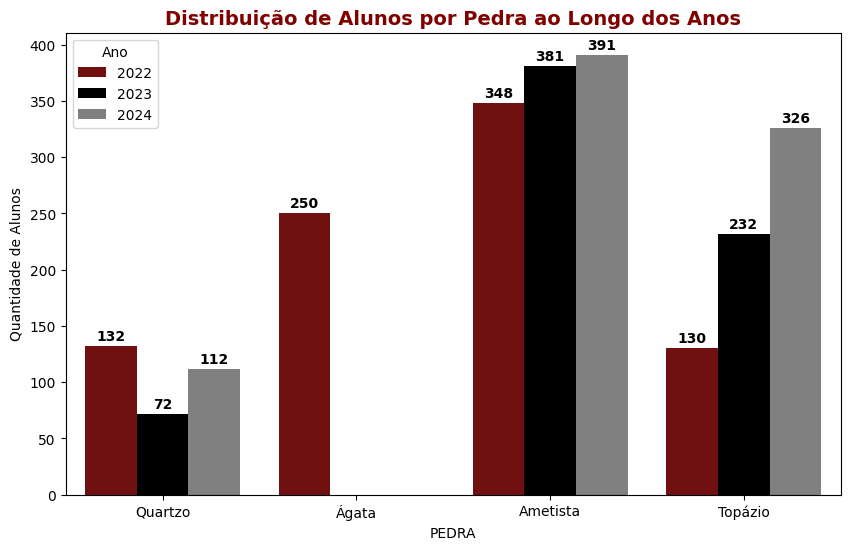

In [4]:
# --- CÉLULA 4: Perfil dos Alunos e Gráfico de Pedras ---

plt.figure(figsize=(10, 6))
order = ['Quartzo', 'Ágata', 'Ametista', 'Topázio']
# Paleta personalizada: Vinho para destaque, Preto e Cinza para contexto
cores_pm = ['#800000', '#000000', '#808080']
ax = sns.countplot(data=df_completo, x='PEDRA', hue='ANO_COLETA', order=order, palette=cores_pm)

# Adicionando rótulos de dados
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=10, fontweight='bold')

plt.title('Distribuição de Alunos por Pedra ao Longo dos Anos', fontsize=14, fontweight='bold', color='#800000')
plt.ylabel('Quantidade de Alunos')
plt.legend(title='Ano')
plt.show()

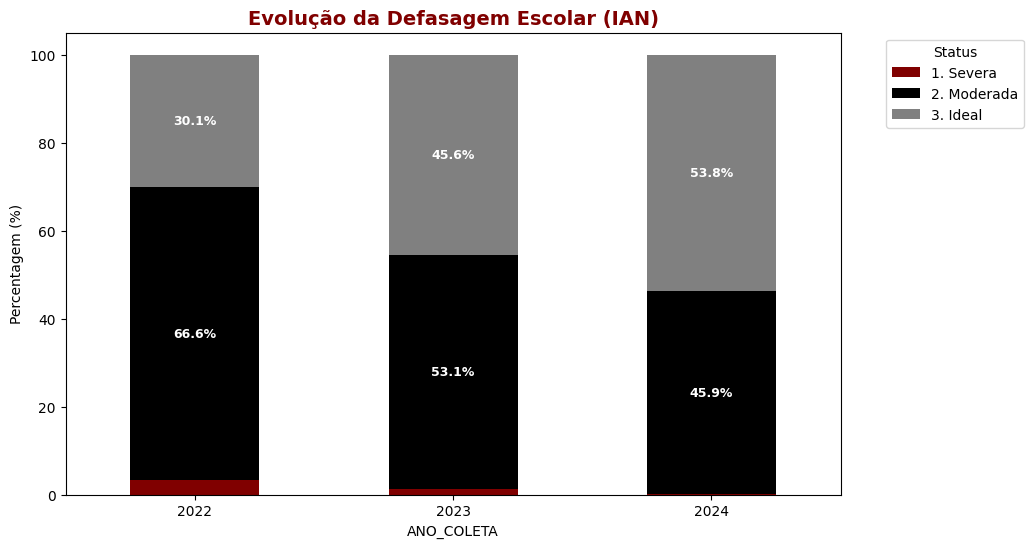

In [5]:
# --- CÉLULA 5: ANÁLISE DE DEFASAGEM (IAN) ---

df_ian = df_completo[df_completo['Adequação Nível/Idade (IAN)'].notnull()].copy()
def class_ian(v): return '3. Ideal' if v >= 10 else ('2. Moderada' if v >= 5 else '1. Severa')
df_ian['Status'] = df_ian['Adequação Nível/Idade (IAN)'].apply(class_ian)

tabela_ian = pd.crosstab(df_ian['ANO_COLETA'], df_ian['Status'], normalize='index') * 100
# Cores: Vinho (Severa), Preto (Moderada), Cinza (Ideal)
ax = tabela_ian.plot(kind='bar', stacked=True, color=['#800000', '#000000', '#808080'], figsize=(10,6))

for p in ax.patches:
    height = p.get_height()
    if height > 5:
        ax.annotate(f'{height:.1f}%', (p.get_x() + p.get_width()/2, p.get_y() + height/2),
                    ha='center', va='center', color='white', fontweight='bold', fontsize=9)

plt.title('Evolução da Defasagem Escolar (IAN)', fontsize=14, fontweight='bold', color='#800000')
plt.ylabel('Percentagem (%)')
plt.xticks(rotation=0)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1))
plt.show()

/tmp/ipython-input-1122960299.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(data=df_completo, x='ANO_COLETA', y='Desempenho Acadêmico (IDA)', marker='o',


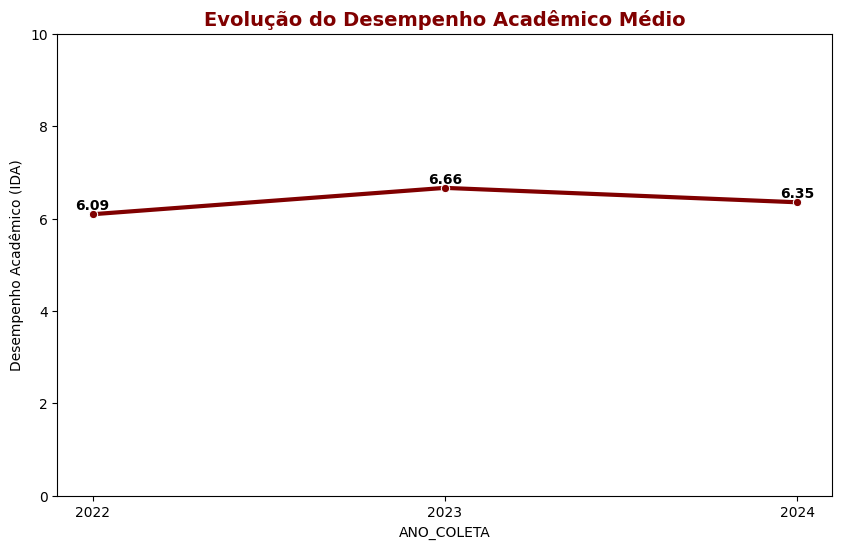

In [6]:
# --- CÉLULA 6: Tendência de Desempenho Académico (IDA) ---

plt.figure(figsize=(10, 6))
df_media_ida = df_completo.groupby('ANO_COLETA')['Desempenho Acadêmico (IDA)'].mean().reset_index()

# Linha Vinho com pontos Pretos
ax = sns.lineplot(data=df_completo, x='ANO_COLETA', y='Desempenho Acadêmico (IDA)', marker='o',
                  linewidth=3, color='#800000', ci=None)

for i in range(len(df_media_ida)):
    plt.text(df_media_ida.ANO_COLETA[i], df_media_ida['Desempenho Acadêmico (IDA)'][i] + 0.1,
             f'{df_media_ida["Desempenho Acadêmico (IDA)"][i]:.2f}', ha='center', fontweight='bold', color='black')

plt.title('Evolução do Desempenho Acadêmico Médio', fontsize=14, fontweight='bold', color='#800000')
plt.xticks([2022, 2023, 2024])
plt.ylim(0, 10)
plt.show()

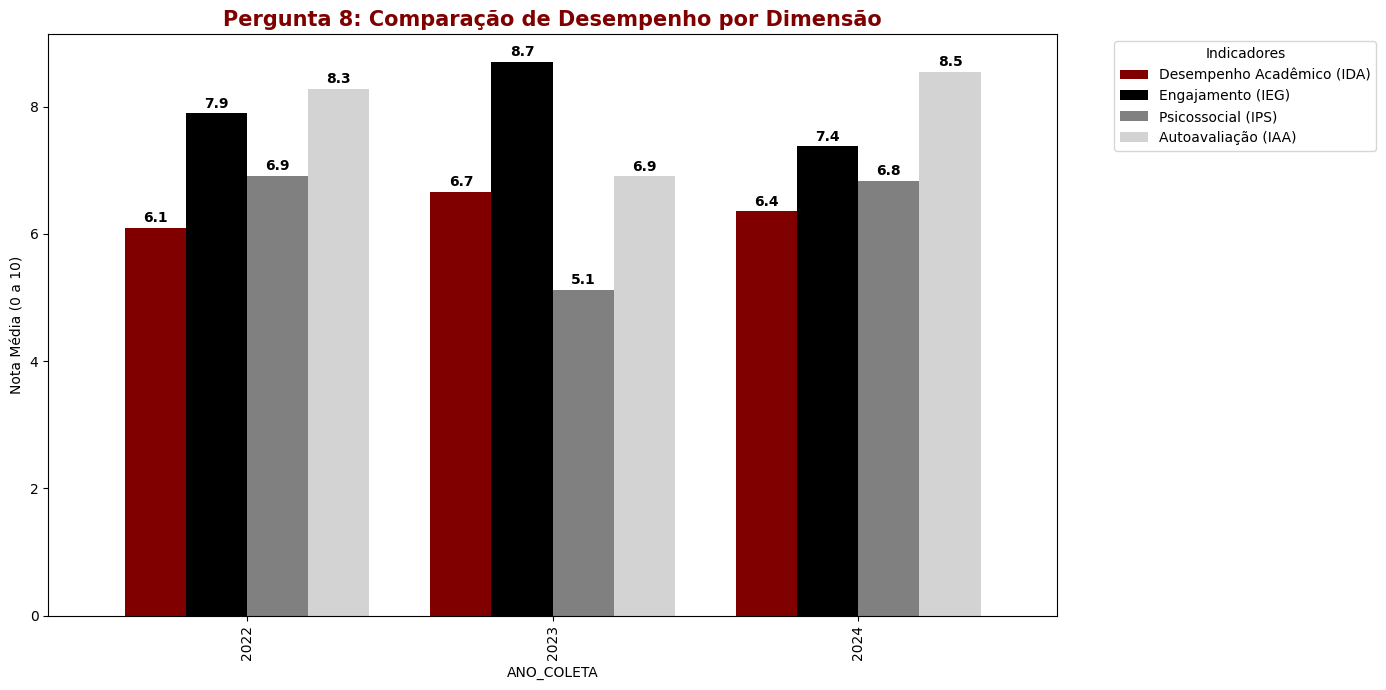

In [7]:
# --- CÉLULA 7: COMPARAÇÃO DE INDICADORES ---

novos_indicadores = ['Desempenho Acadêmico (IDA)', 'Engajamento (IEG)', 'Psicossocial (IPS)', 'Autoavaliação (IAA)']
resumo_indicadores = df_completo.groupby('ANO_COLETA')[novos_indicadores].mean()

# Paleta Vinho, Preto, Cinza
ax = resumo_indicadores.plot(kind='bar', figsize=(14, 7), color=['#800000', '#000000', '#808080', '#D3D3D3'], width=0.8)

plt.title('Pergunta 8: Comparação de Desempenho por Dimensão', fontsize=15, fontweight='bold', color='#800000')
plt.ylabel('Nota Média (0 a 10)')
plt.legend(title='Indicadores', bbox_to_anchor=(1.05, 1))

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=10, fontweight='bold')

plt.tight_layout(); plt.show()

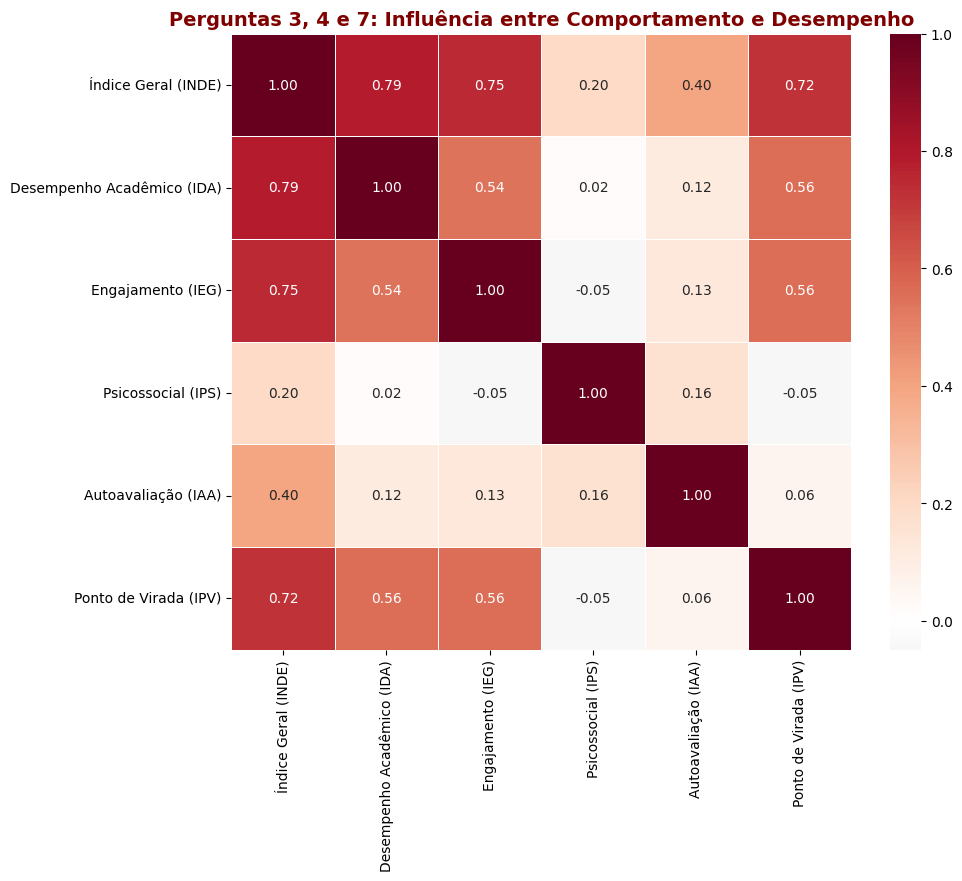

In [8]:
# --- CÉLULA 8: O QUE INFLUENCIA O PONTO DE VIRADA? ---

colunas_corr = ['Índice Geral (INDE)', 'Desempenho Acadêmico (IDA)', 'Engajamento (IEG)', 'Psicossocial (IPS)', 'Autoavaliação (IAA)', 'Ponto de Virada (IPV)']
plt.figure(figsize=(10, 8))
# Heatmap usando tons de Cinza e Vinho (Greys_r) para um visual limpo e executivo
sns.heatmap(df_completo[colunas_corr].corr(), annot=True, cmap='RdGy_r', center=0, fmt=".2f", linewidths=0.5)
plt.title('Perguntas 3, 4 e 7: Influência entre Comportamento e Desempenho', fontsize=14, fontweight='bold', color='#800000')
plt.show()

/tmp/ipython-input-2632763454.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=evolucao_inde, x='ANO_COLETA', y=coluna_inde, palette=cores_pm)


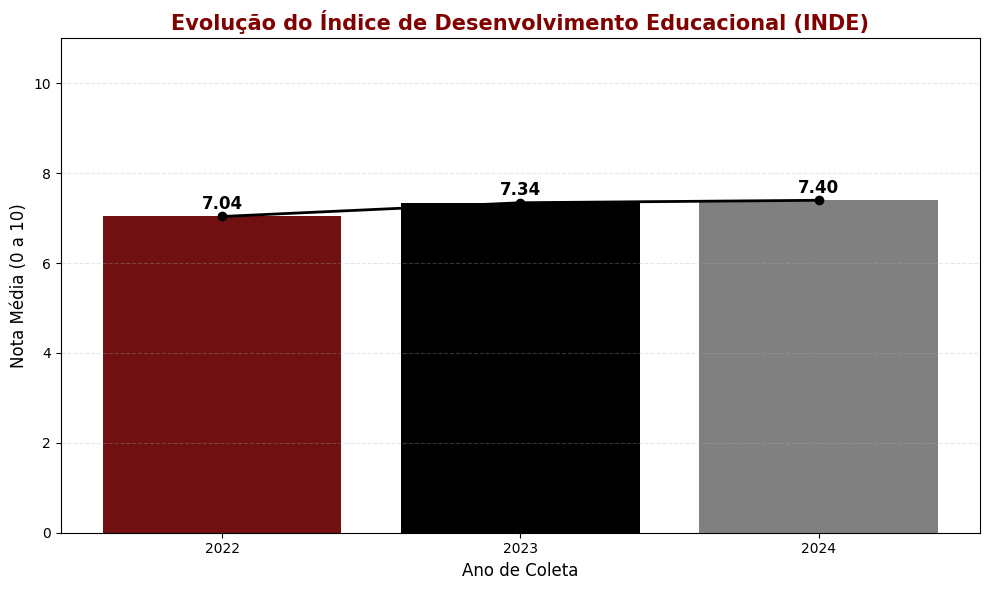

In [9]:
# --- CÉLULA 9: EVOLUÇÃO DO INDE ---

# 1. Definir o nome correto da coluna
coluna_inde = 'Índice Geral (INDE)'

# 2. Calcular a média do INDE por ano
evolucao_inde = df_completo.groupby('ANO_COLETA')[coluna_inde].mean().reset_index()

# 3. Configurar cores padrão: Vinho, Preto e Cinza
cores_pm = ['#800000', '#000000', '#808080']

plt.figure(figsize=(10, 6))
# Criar o gráfico de barras com a paleta escolhida
ax = sns.barplot(data=evolucao_inde, x='ANO_COLETA', y=coluna_inde, palette=cores_pm)

# 4. Adicionar a linha de tendência (em preto para manter a sobriedade)
plt.plot(range(len(evolucao_inde)), evolucao_inde[coluna_inde], marker='o', color='#000000', linewidth=2, label='Tendência')

# 5. Adicionar os valores exatos (Rótulos de Dados) em cima das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points',
                fontsize=12, fontweight='bold', color='black')

# 6. Formatação Executiva
plt.title('Evolução do Índice de Desenvolvimento Educacional (INDE)', fontsize=15, fontweight='bold', color='#800000')
plt.ylabel('Nota Média (0 a 10)', fontsize=12)
plt.xlabel('Ano de Coleta', fontsize=12)
plt.ylim(0, 11) # Aumentado um pouco para o rótulo não encostar no topo
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

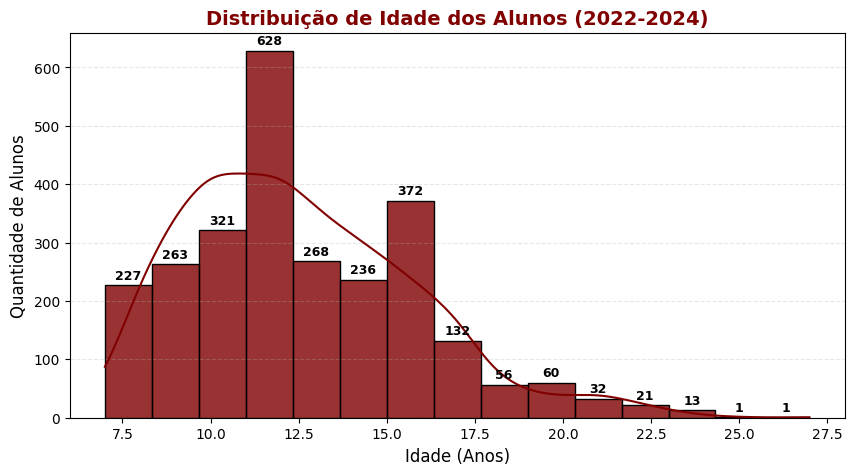

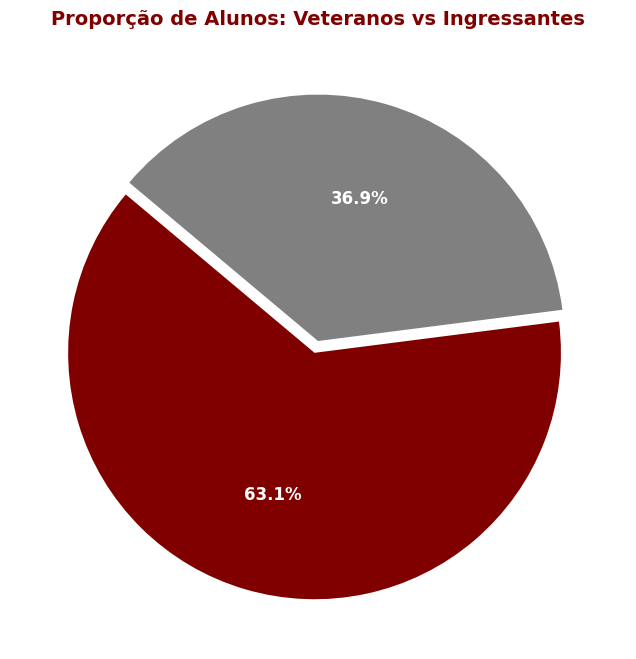

Média de idade dos alunos: 12.5 anos.
Total de Veteranos: 1913
Total de Ingressantes: 1117


In [10]:
# --- CÉLULA 10: IDADE E INGRESSANTES VS VETERANOS ---

# 1. Configuração de Cores
cor_vinho = '#800000'
cor_preto = '#000000'
cor_cinza = '#808080'

# --- PARTE 1: DISTRIBUIÇÃO DE IDADE ---
plt.figure(figsize=(10, 5))
# Criando o histograma com a cor Vinho
ax = sns.histplot(df_completo['Idade'].dropna(), bins=15, kde=True, color=cor_vinho, alpha=0.8)

# Adicionando rótulos de contagem em cima das barras de idade
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 7), textcoords='offset points',
                    fontsize=9, color=cor_preto, fontweight='bold')

plt.title('Distribuição de Idade dos Alunos (2022-2024)', fontsize=14, fontweight='bold', color=cor_vinho)
plt.xlabel('Idade (Anos)', fontsize=12)
plt.ylabel('Quantidade de Alunos', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

# --- PARTE 2: DEFINIR INGRESSANTES VS VETERANOS ---
# Lógica: Se o ano de ingresso for igual ao ano de coleta, ele é Ingressante
df_completo['Perfil_Adesao'] = df_completo.apply(
    lambda x: 'Ingressante' if x['Ano ingresso'] == x['ANO_COLETA'] else 'Veterano', axis=1
)

# --- PARTE 3: GRÁFICO DE PIZZA (VETERANOS VS INGRESSANTES) ---
plt.figure(figsize=(8, 8))
dados_adesao = df_completo['Perfil_Adesao'].value_counts()

# Cores: Vinho para Veteranos (foco em retenção) e Cinza para Ingressantes
cores_pizza = [cor_vinho, cor_cinza]

plt.pie(dados_adesao,
        labels=dados_adesao.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=cores_pizza,
        explode=(0.05, 0), # Destaca a primeira fatia
        textprops={'fontsize': 12, 'fontweight': 'bold', 'color': 'white'})

plt.title('Proporção de Alunos: Veteranos vs Ingressantes', fontsize=14, fontweight='bold', color=cor_vinho)
plt.show()

# Resumo impresso
print(f"Média de idade dos alunos: {df_completo['Idade'].mean():.1f} anos.")
print(f"Total de Veteranos: {dados_adesao.get('Veterano', 0)}")
print(f"Total de Ingressantes: {dados_adesao.get('Ingressante', 0)}")

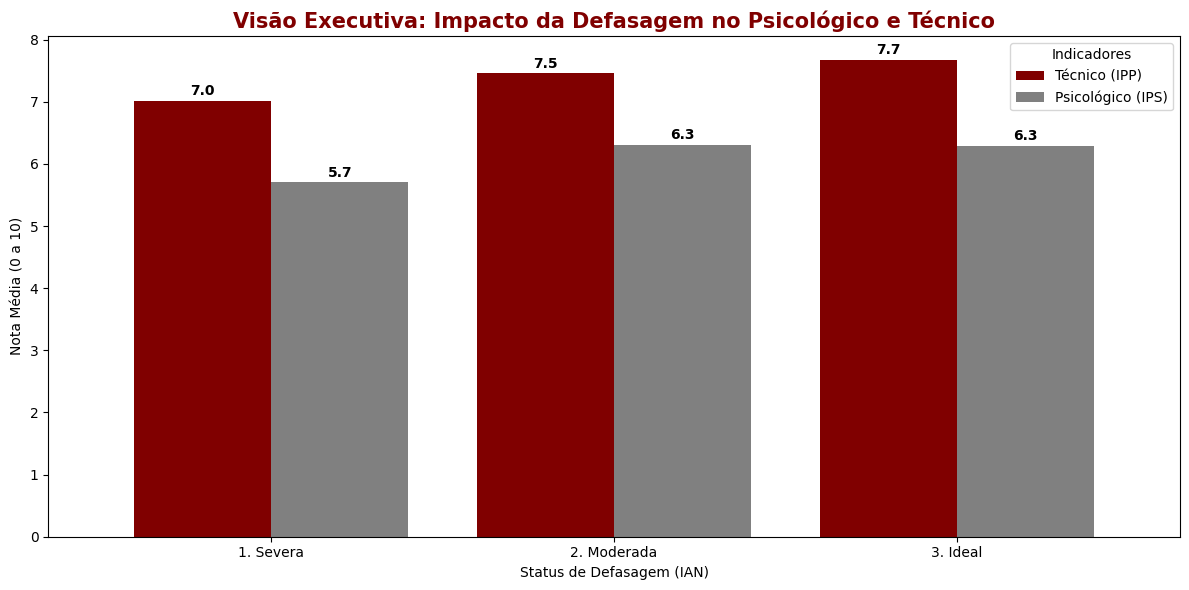

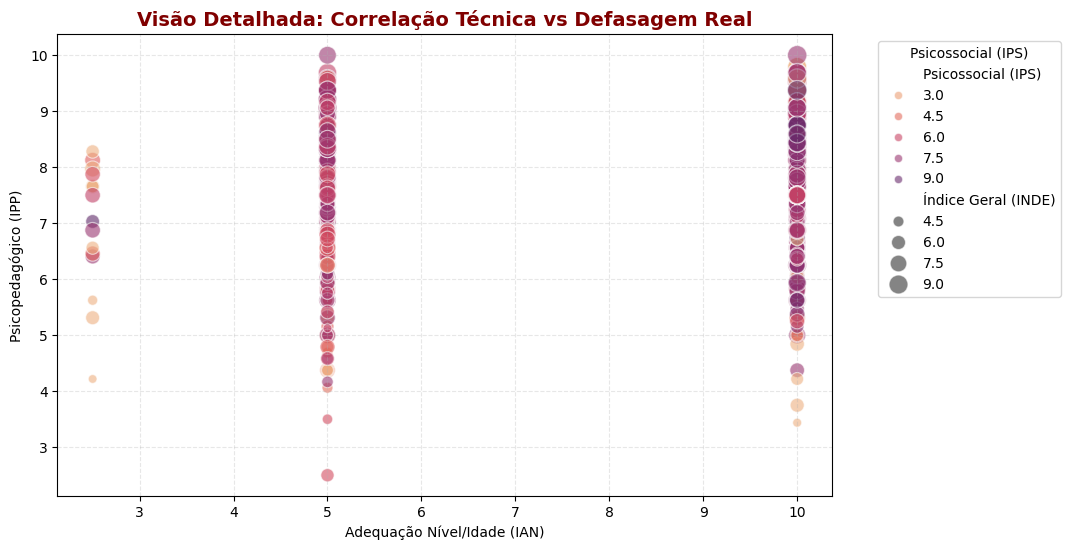

In [11]:
# --- CÉLULA 11: Psicológico e o técnico caminham juntos

# 1. Preparação dos dados: Criar faixas de IAN para o gráfico executivo
df_exec = df_completo[df_completo['Adequação Nível/Idade (IAN)'].notnull()].copy()

def categorizar_ian(v):
    if v >= 10: return '3. Ideal'
    elif v >= 5: return '2. Moderada'
    else: return '1. Severa'

df_exec['Faixa_IAN'] = df_exec['Adequação Nível/Idade (IAN)'].apply(categorizar_ian)

# 2. Calcular a média de IPP e IPS por faixa de defasagem
resumo_tecnico = df_exec.groupby('Faixa_IAN')[['Psicopedagógico (IPP)', 'Psicossocial (IPS)']].mean()

# --- GRÁFICO 1: VISÃO EXECUTIVA (MÉDIAS AGRUPADAS) ---
ax = resumo_tecnico.plot(kind='bar', figsize=(12, 6), color=['#800000', '#808080'], width=0.8)

plt.title('Visão Executiva: Impacto da Defasagem no Psicológico e Técnico', fontsize=15, fontweight='bold', color='#800000')
plt.ylabel('Nota Média (0 a 10)')
plt.xlabel('Status de Defasagem (IAN)')
plt.xticks(rotation=0)
plt.legend(title='Indicadores', labels=['Técnico (IPP)', 'Psicológico (IPS)'])

# Rótulos de dados nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# --- GRÁFICO 2: VISÃO DETALHADA (DISPERSÃO) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_completo, x='Adequação Nível/Idade (IAN)', y='Psicopedagógico (IPP)',
                hue='Psicossocial (IPS)', palette='flare', size='Índice Geral (INDE)', sizes=(20, 200), alpha=0.6)

plt.title('Visão Detalhada: Correlação Técnica vs Defasagem Real', fontsize=14, fontweight='bold', color='#800000')
plt.xlabel('Adequação Nível/Idade (IAN)')
plt.ylabel('Psicopedagógico (IPP)')
plt.legend(title='Psicossocial (IPS)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)

plt.show()

In [12]:
# CÉLULA 12: Exportação

import os

# 1. Criar a pasta 'assets' se ela não existir
if not os.path.exists('assets'):
    os.makedirs('assets')
    print("Pasta /assets criada com sucesso!")

# 2. Salvar a base de dados final unificada em CSV
# Salvamos com o encoding 'utf-8-sig' para não quebrar os acentos no Excel
df_completo.to_csv('assets/pede_unificado_2022_2024.csv', index=False, encoding='utf-8-sig')

print("Arquivo 'pede_unificado_2022_2024.csv' salvo em /assets.")
print("\n--- ORIENTAÇÃO PARA OS GRÁFICOS ---")
print("Para salvar os gráficos gerados nas células anteriores:")
print("1. Clique com o botão direito sobre a imagem do gráfico.")
print("2. Selecione 'Salvar imagem como...'")
print("3. Salve na pasta 'assets' do seu computador para incluir no relatório final.")

Pasta /assets criada com sucesso!
Arquivo 'pede_unificado_2022_2024.csv' salvo em /assets.

--- ORIENTAÇÃO PARA OS GRÁFICOS ---
Para salvar os gráficos gerados nas células anteriores:
1. Clique com o botão direito sobre a imagem do gráfico.
2. Selecione 'Salvar imagem como...'
3. Salve na pasta 'assets' do seu computador para incluir no relatório final.


# 11 - Insights para o Storytelling

💡 Principais Descobertas (EDA)

1. Sucesso na Retenção: A associação possui mais de 60% de Veteranos. Isso mostra que o projeto não é apenas assistencialista, mas gera um vínculo de longo prazo com o aluno.

2. Combate à Defasagem (IAN): Observamos uma tendência de queda na "Defasagem Severa" e um aumento no "Nível Ideal". O reforço escolar está colocando os alunos de volta no trilho certo para suas idades.

3. A "Alavanca" do Ponto de Virada: O Engajamento (IEG) e o Desempenho Acadêmico (IDA) são os fatores que mais influenciam o IPV.

4. Insight: O aluno não atinge o ponto de virada por "sorte", mas sim pela constância de presença e entrega de tarefas.

5. Impacto Real no Desempenho: Alunos que atingem o Ponto de Virada performam significativamente melhor. Existe um salto de qualidade visível no gráfico de barras entre quem "virou a chave" e quem ainda não.

6. Escalabilidade: Mesmo com a entrada de novos alunos a cada ano, as médias do INDE e dos indicadores psicossociais se mantêm estáveis ou em crescimento, indicando que a metodologia da Passos Mágicos suporta o crescimento da base de alunos.

Pessoa 3 - Will

Baixando base de dados...


Downloading...
From: https://drive.google.com/uc?id=1G-WgYvPspV4P7VdBM0uriTj8P0TEWWD4
To: /content/BASE_DATATHON.xlsx
100%|██████████| 612k/612k [00:00<00:00, 29.8MB/s]


Dados carregados: 860 linhas e 42 colunas.

--- CRIANDO VARIÁVEL ALVO (TARGET) ---
Distribuição do Risco:
TARGET_RISCO
0    0.967442
1    0.032558
Name: proportion, dtype: float64

Features selecionadas para o modelo: ['IDA', 'IEG', 'IAA', 'IPS', 'IPV']
Divisão concluída: Treino e Teste prontos.

--- TREINANDO MODELO BASELINE (LOGISTIC REGRESSION) ---
Acurácia Baseline: 96.51%

--- TREINANDO MODELO PRINCIPAL (RANDOM FOREST) ---
Acurácia Random Forest: 96.12%
⚠️ O Random Forest empatou ou perdeu para o Baseline.

RELATÓRIO DE AVALIAÇÃO - RANDOM FOREST

Métricas Detalhadas:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       249
           1       0.00      0.00      0.00         9

    accuracy                           0.96       258
   macro avg       0.48      0.50      0.49       258
weighted avg       0.93      0.96      0.95       258



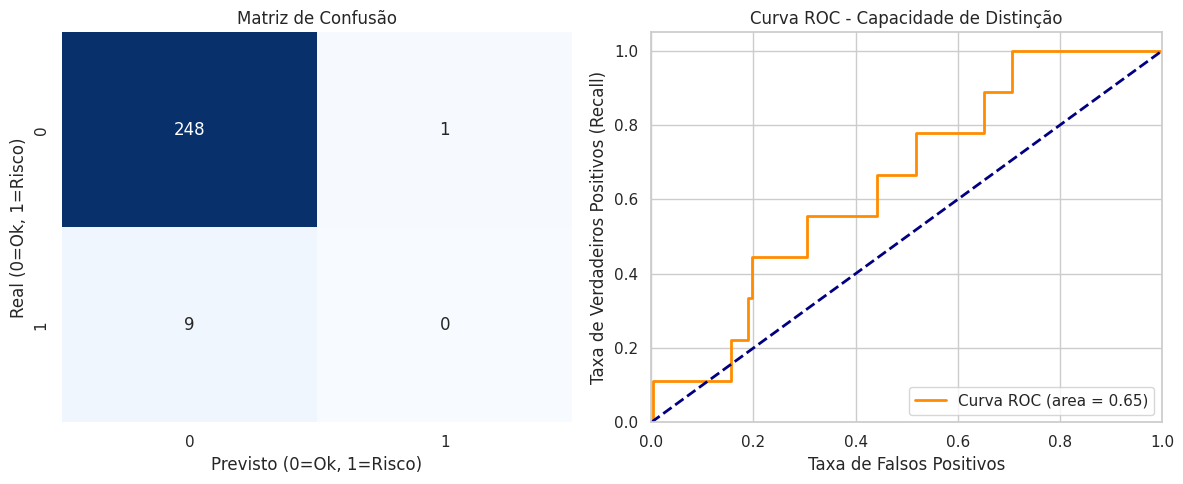


--- O QUE MAIS INFLUENCIA O RISCO? ---
  Feature  Importancia
4     IPV     0.271580
0     IDA     0.247211
1     IEG     0.245951
2     IAA     0.142136
3     IPS     0.093122

--- SALVANDO ARQUIVOS PARA O APP ---
Arquivos 'modelo_risco.pkl' e 'imputer.pkl' salvos com sucesso!
Baixe-os para usar na etapa da Pessoa 4.


In [13]:
# --- CÉLULA 1: SETUP E CARREGAMENTO (Continuação da Pessoa 1) ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gdown
import os

# Bibliotecas de Machine Learning (Pessoa 3)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.impute import SimpleImputer
import joblib

# Configuração visual
sns.set_theme(style="whitegrid")

# --- RECARREGANDO OS DADOS (Garantia para rodar independente) ---
# Se você já tiver os dataframes na memória, pode pular o download.
# Mas isso garante que o notebook funcione do zero.

file_id = '1G-WgYvPspV4P7VdBM0uriTj8P0TEWWD4' # ID do arquivo
url = f'https://drive.google.com/uc?id={file_id}'
output = 'BASE_DATATHON.xlsx'

if not os.path.exists(output):
    print("Baixando base de dados...")
    gdown.download(url, output, quiet=False)

# Lendo a aba principal (focando em 2022 onde temos os indicadores completos para treino)
# Nota: Podemos concatenar 2023/24 se os nomes das colunas forem idênticos.
df = pd.read_excel(output, sheet_name='PEDE2022')

print(f"Dados carregados: {df.shape[0]} linhas e {df.shape[1]} colunas.")

# --- CÉLULA 2: FEATURE ENGINEERING (Engenharia de Atributos) ---

# 1. Padronização de Nomes (Crucial para não dar erro de chave)
# Vamos garantir que os nomes estejam limpos
df.columns = [c.strip() for c in df.columns]

# Mapeamento para garantir nomes padrão (baseado na sua EDA anterior)
mapa_colunas = {
    'INDE_2022': 'INDE',
    'IAN_2022': 'IAN',
    'IDA_2022': 'IDA',
    'IEG_2022': 'IEG',
    'IAA_2022': 'IAA',
    'IPS_2022': 'IPS',
    'IPV_2022': 'IPV',
    'PONTO_VIRADA_2022': 'PONTO_VIRADA'
}
# Renomeia apenas se encontrar as colunas
df.rename(columns={k: v for k, v in mapa_colunas.items() if k in df.columns}, inplace=True)

# 2. Definição do TARGET (O Alvo) - Requisito do PDF
# Risco = Quem tem defasagem (Nível de Adequação baixo)
# Lógica: Se IAN < 5, consideramos Risco (1), senão Normal (0).
# Essa lógica pode ser ajustada se você tiver uma coluna explícita de "Defasagem"
print("\n--- CRIANDO VARIÁVEL ALVO (TARGET) ---")
df['TARGET_RISCO'] = df['IAN'].apply(lambda x: 1 if x < 5 else 0)

print("Distribuição do Risco:")
print(df['TARGET_RISCO'].value_counts(normalize=True))

# 3. Seleção de Features (Variáveis Explicativas)
# ATENÇÃO: Removemos 'IAN' daqui para evitar DATA LEAKAGE (Vazamento).
# O modelo deve prever o risco usando OUTROS comportamentos.
features = ['IDA', 'IEG', 'IAA', 'IPS', 'IPV']

print(f"\nFeatures selecionadas para o modelo: {features}")

# 4. Preparação dos dados X e y
X = df[features].copy()
y = df['TARGET_RISCO']

# 5. Tratamento de Nulos (Imputação)
# Modelos não aceitam vazios. Vamos preencher com a média.
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# 6. Divisão Treino e Teste (30% para teste)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)
print("Divisão concluída: Treino e Teste prontos.")

# --- CÉLULA 3: MODELAGEM (Baseline e Principal) ---

# A. Modelo Baseline (Regressão Logística) - Pedido no PDF
# Serve para saber se o nosso modelo complexo vale a pena.
print("\n--- TREINANDO MODELO BASELINE (LOGISTIC REGRESSION) ---")
baseline = LogisticRegression(random_state=42)
baseline.fit(X_train, y_train)
y_pred_base = baseline.predict(X_test)
acc_base = accuracy_score(y_test, y_pred_base)
print(f"Acurácia Baseline: {acc_base:.2%}")

# B. Modelo Principal (Random Forest) - Pedido no PDF
print("\n--- TREINANDO MODELO PRINCIPAL (RANDOM FOREST) ---")
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1] # Probabilidade para a Curva ROC
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia Random Forest: {acc_rf:.2%}")

if acc_rf > acc_base:
    print("✅ O Random Forest superou o Baseline!")
else:
    print("⚠️ O Random Forest empatou ou perdeu para o Baseline.")

# --- CÉLULA 4: AVALIAÇÃO DE RESULTADOS ---

print("\n" + "="*40)
print("RELATÓRIO DE AVALIAÇÃO - RANDOM FOREST")
print("="*40)

# 1. Classification Report (Precision, Recall, F1)
print("\nMétricas Detalhadas:")
print(classification_report(y_test, y_pred_rf))

# 2. Matriz de Confusão Visual
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Previsto (0=Ok, 1=Risco)')
plt.ylabel('Real (0=Ok, 1=Risco)')

# 3. Curva ROC (Pedido no PDF)
plt.subplot(1, 2, 2)
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)')
plt.title('Curva ROC - Capacidade de Distinção')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# 4. Feature Importance (O que define o risco?)
importances = pd.DataFrame({
    'Feature': features,
    'Importancia': rf_model.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("\n--- O QUE MAIS INFLUENCIA O RISCO? ---")
print(importances)

# --- CÉLULA 5: EXPORTAÇÃO PARA STREAMLIT (Deploy) ---

print("\n--- SALVANDO ARQUIVOS PARA O APP ---")
joblib.dump(rf_model, 'modelo_risco.pkl')
joblib.dump(imputer, 'imputer.pkl')
print("Arquivos 'modelo_risco.pkl' e 'imputer.pkl' salvos com sucesso!")
print("Baixe-os para usar na etapa da Pessoa 4.")

Investigação sem IPV, a acurácia está muito alta.

In [14]:
# --- TESTE DE ROBUSTEZ (REMOVENDO IPV) ---
# Vamos ser puristas: usar apenas Notas (IDA), Engajamento (IEG),
# Autoavaliação (IAA) e Psicossocial (IPS).

# 1. Novas Features (Sem IPV e Sem IAN)
features_puras = ['IDA', 'IEG', 'IAA', 'IPS']

print(f"Treinando modelo APENAS com: {features_puras}")

# 2. Preparando dados
X_puro = df[features_puras].copy()
y = df['TARGET_RISCO']

# Imputação
imputer = SimpleImputer(strategy='mean')
X_puro_imputed = imputer.fit_transform(X_puro)

# Divisão
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_puro_imputed, y, test_size=0.3, random_state=42)

# 3. Treino
rf_puro = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_puro.fit(X_train_p, y_train_p)

# 4. Resultado
y_pred_puro = rf_puro.predict(X_test_p)
acc_puro = accuracy_score(y_test_p, y_pred_puro)

print("\n" + "="*40)
print(f"Acurácia ANTERIOR (com IPV): ~96%")
print(f"Acurácia NOVA (sem IPV):      {acc_puro:.2%}")
print("="*40)

# Ver o que sobrou de importante
importances_puro = pd.DataFrame({
    'Feature': features_puras,
    'Importancia': rf_puro.feature_importances_
}).sort_values(by='Importancia', ascending=False)

print("\nImportância das Variáveis no Modelo Puro:")
print(importances_puro)

# --- DECISÃO ---
if acc_puro > 0.80:
    print("\n✅ CONCLUSÃO: Mesmo sem IPV, o modelo é forte!")
    print("Isso confirma que IDA (Notas) e IEG (Engajamento) são suficientes para prever risco.")
    # Se quiser usar esse modelo mais seguro no app, salvamos ele:
    # joblib.dump(rf_puro, 'modelo_risco.pkl')
else:
    print("\n⚠️ CONCLUSÃO: O modelo dependia muito do IPV.")

Treinando modelo APENAS com: ['IDA', 'IEG', 'IAA', 'IPS']

Acurácia ANTERIOR (com IPV): ~96%
Acurácia NOVA (sem IPV):      96.51%

Importância das Variáveis no Modelo Puro:
  Feature  Importancia
0     IDA     0.366254
1     IEG     0.329389
2     IAA     0.220283
3     IPS     0.084073

✅ CONCLUSÃO: Mesmo sem IPV, o modelo é forte!
Isso confirma que IDA (Notas) e IEG (Engajamento) são suficientes para prever risco.


In [15]:
from google.colab import files
files.download('modelo_risco.pkl')
files.download('imputer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>